<h2>Coding A Neural Network 2: Image Classification</h2>

<h3>Step 1: Load the Libraries</h3>

In [51]:
import keras                               # deep learning package
from keras.datasets import mnist           # dataset we will use to train our model
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connected layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt            # visualize images
from keras.preprocessing import image      # preprocess images
from PIL import ImageOps                      # preprocess images

<h3>Step 2: Obtain Data</h3>

In [52]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [53]:
#look at the type of data stored in one image (there is 6000 of them!)
train_x[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
train_x = train_x.reshape(60000,784)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,784)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [45]:
train_x[1] #view the content of one reshaped image. How is it different from before?


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3>Step 4: Define Your Model</h3>

In [46]:
model = Sequential()                                               #explain sequential 
model.add(Dense(units=128,activation="relu",input_shape=(784,)))   #first layer
model.add(Dense(units=128,activation="relu"))                      #second layer
model.add(Dense(units=128,activation="relu"))                      #third layer
model.add(Dense(units=10,activation="softmax"))                    #output layer


<h3>Step 5: Compile Your Model</h3>

In [50]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [48]:
model.fit(train_x,train_y,batch_size=32,epochs=30,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Epoch 1/30


   32/60000 [..............................] - ETA: 6:53 - loss: 2.3033 - acc: 0.0938

  384/60000 [..............................] - ETA: 46s - loss: 2.3274 - acc: 0.0938 

  800/60000 [..............................] - ETA: 25s - loss: 2.3230 - acc: 0.1050

  960/60000 [..............................] - ETA: 24s - loss: 2.3205 - acc: 0.1083

 1408/60000 [..............................] - ETA: 20s - loss: 2.3126 - acc: 0.1193

 1920/60000 [..............................] - ETA: 17s - loss: 2.3036 - acc: 0.1187

 2432/60000 [>.............................] - ETA: 15s - loss: 2.2955 - acc: 0.1242

 2464/60000 [>.............................] - ETA: 16s - loss: 2.2955 - acc: 0.1250



 2944/60000 [>.............................] - ETA: 15s - loss: 2.2905 - acc: 0.1332

 3424/60000 [>.............................] - ETA: 14s - loss: 2.2860 - acc: 0.1352

 3936/60000 [>.............................] - ETA: 14s - loss: 2.2799 - acc: 0.1446

 4416/60000 [=>............................] - ETA: 13s - loss: 2.2769 - acc: 0.1479

 4768/60000 [=>............................] - ETA: 13s - loss: 2.2746 - acc: 0.1510

 4896/60000 [=>............................] - ETA: 13s - loss: 2.2739 - acc: 0.1520

 5280/60000 [=>............................] - ETA: 12s - loss: 2.2719 - acc: 0.1559

 5440/60000 [=>............................] - ETA: 13s - loss: 2.2700 - acc: 0.1585

 5888/60000 [=>............................] - ETA: 12s - loss: 2.2645 - acc: 0.1658

 6400/60000 [==>...........................] - ETA: 12s - loss: 2.2606 - acc: 0.1705

 6816/60000 [==>...........................] - ETA: 12s - loss: 2.2572 - acc: 0.1749

 7200/60000 [==>...........................] - ETA: 12s - loss: 2.2538 - acc: 0.1799

 7296/60000 [==>...........................] - ETA: 12s - loss: 2.2526 - acc: 0.1813

 7680/60000 [==>...........................] - ETA: 11s - loss: 2.2490 - acc: 0.1872

 7776/60000 [==>...........................] - ETA: 12s - loss: 2.2482 - acc: 0.1879

 8160/60000 [===>..........................] - ETA: 11s - loss: 2.2439 - acc: 0.1935

 8320/60000 [===>..........................] - ETA: 11s - loss: 2.2422 - acc: 0.1964

 8736/60000 [===>..........................] - ETA: 11s - loss: 2.2383 - acc: 0.1995

 9120/60000 [===>..........................] - ETA: 11s - loss: 2.2341 - acc: 0.2041

 9344/60000 [===>..........................] - ETA: 11s - loss: 2.2319 - acc: 0.2070

 9504/60000 [===>..........................] - ETA: 11s - loss: 2.2310 - acc: 0.2083

 9792/60000 [===>..........................] - ETA: 11s - loss: 2.2283 - acc: 0.2116

 9984/60000 [===>..........................] - ETA: 11s - loss: 2.2264 - acc: 0.2145

10144/60000 [====>.........................] - ETA: 11s - loss: 2.2248 - acc: 0.2164

10336/60000 [====>.........................] - ETA: 11s - loss: 2.2230 - acc: 0.2188

10400/60000 [====>.........................] - ETA: 11s - loss: 2.2222 - acc: 0.2196

10592/60000 [====>.........................] - ETA: 12s - loss: 2.2203 - acc: 0.2219

10848/60000 [====>.........................] - ETA: 12s - loss: 2.2183 - acc: 0.2246

11264/60000 [====>.........................] - ETA: 11s - loss: 2.2140 - acc: 0.2294

11392/60000 [====>.........................] - ETA: 12s - loss: 2.2125 - acc: 0.2317

11520/60000 [====>.........................] - ETA: 12s - loss: 2.2112 - acc: 0.2326

11712/60000 [====>.........................] - ETA: 12s - loss: 2.2087 - acc: 0.2351

12000/60000 [=====>........................] - ETA: 12s - loss: 2.2052 - acc: 0.2392

12256/60000 [=====>........................] - ETA: 12s - loss: 2.2028 - acc: 0.2417

12608/60000 [=====>........................] - ETA: 12s - loss: 2.1993 - acc: 0.2452

12704/60000 [=====>........................] - ETA: 12s - loss: 2.1981 - acc: 0.2465

12960/60000 [=====>........................] - ETA: 12s - loss: 2.1955 - acc: 0.2492

13152/60000 [=====>........................] - ETA: 12s - loss: 2.1935 - acc: 0.2512

13504/60000 [=====>........................] - ETA: 11s - loss: 2.1903 - acc: 0.2545

13632/60000 [=====>........................] - ETA: 11s - loss: 2.1891 - acc: 0.2551

13920/60000 [=====>........................] - ETA: 11s - loss: 2.1860 - acc: 0.2583

14304/60000 [======>.......................] - ETA: 11s - loss: 2.1821 - acc: 0.2622

14592/60000 [======>.......................] - ETA: 11s - loss: 2.1786 - acc: 0.2657

14816/60000 [======>.......................] - ETA: 11s - loss: 2.1766 - acc: 0.2675

15168/60000 [======>.......................] - ETA: 11s - loss: 2.1730 - acc: 0.2710

15232/60000 [======>.......................] - ETA: 11s - loss: 2.1722 - acc: 0.2714

15520/60000 [======>.......................] - ETA: 11s - loss: 2.1685 - acc: 0.2753

15616/60000 [======>.......................] - ETA: 11s - loss: 2.1675 - acc: 0.2761

15872/60000 [======>.......................] - ETA: 11s - loss: 2.1647 - acc: 0.2790

16096/60000 [=======>......................] - ETA: 11s - loss: 2.1628 - acc: 0.2810

16288/60000 [=======>......................] - ETA: 11s - loss: 2.1612 - acc: 0.2831

16672/60000 [=======>......................] - ETA: 11s - loss: 2.1565 - acc: 0.2877

16736/60000 [=======>......................] - ETA: 11s - loss: 2.1558 - acc: 0.2885

17056/60000 [=======>......................] - ETA: 11s - loss: 2.1521 - acc: 0.2917

17216/60000 [=======>......................] - ETA: 11s - loss: 2.1503 - acc: 0.2933

17536/60000 [=======>......................] - ETA: 11s - loss: 2.1468 - acc: 0.2965

17632/60000 [=======>......................] - ETA: 11s - loss: 2.1456 - acc: 0.2973

17952/60000 [=======>......................] - ETA: 10s - loss: 2.1419 - acc: 0.3004

18240/60000 [========>.....................] - ETA: 10s - loss: 2.1383 - acc: 0.3036

18304/60000 [========>.....................] - ETA: 10s - loss: 2.1378 - acc: 0.3040

18656/60000 [========>.....................] - ETA: 10s - loss: 2.1338 - acc: 0.3071

18816/60000 [========>.....................] - ETA: 10s - loss: 2.1321 - acc: 0.3086

19136/60000 [========>.....................] - ETA: 10s - loss: 2.1278 - acc: 0.3126

<h3>Step 7: Save Your Model</h3>

In [49]:
model.save("mnistmodel.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [33]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                  #print the accuracy

   32/10000 [..............................] - ETA: 19s

  896/10000 [=>............................] - ETA: 1s 

 1888/10000 [====>.........................] - ETA: 0s

 2656/10000 [======>.......................] - ETA: 0s

 3936/10000 [==========>...................] - ETA: 0s

 4896/10000 [=============>................] - ETA: 0s

 5888/10000 [================>.............] - ETA: 0s

 6816/10000 [===================>..........] - ETA: 0s

 7552/10000 [=====================>........] - ETA: 0s

 8416/10000 [========================>.....] - ETA: 0s



 9312/10000 [==========================>...] - ETA: 0s

 9728/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 1s 65us/step


Accuracy:  0.9472


<h3>Step 9: Test a Case</h3>

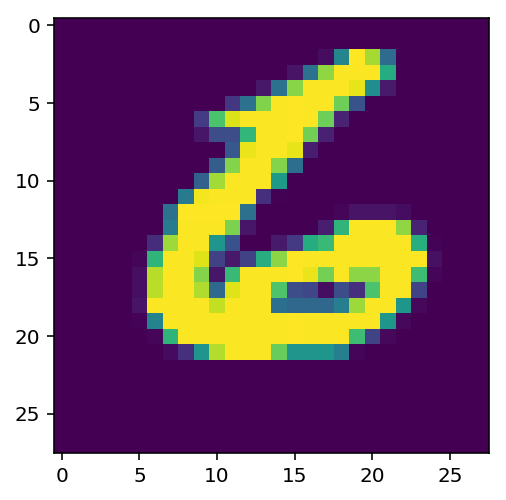

In [39]:
sample = test_x[-1]                  #pull a case from test set
sample = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample)                    #display the image


In [35]:
sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)     #based on the pixel values, predict the number
print("Class: ",prediction)                     #print the prediction

Class:  [6]


In [36]:
#display probabilty of each possible number
(model.predict(sample))

array([[2.1346268e-05, 4.9292043e-10, 4.2099306e-05, 1.2988092e-08,
        3.4773323e-06, 1.2478705e-06, 9.9993157e-01, 1.7679949e-10,
        2.1849331e-07, 1.4226182e-08]], dtype=float32)

<h3>Assignment 2</h3>
Try different cases! Are there numbers that are harder to classify?

Try plotting accuracy and loss for all epochs